In [10]:
from requests import Request , Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url='https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters={
    'start':'1',
    'limit':'15',
    'convert':'USD'
}
headers={
    'Accepts':'application/json',
    'X-CMC_PRO_API_KEY':'49421eea-d570-4f2c-92ad-85f2b54e1659',
}

session=Session()
session.headers.update(headers)

try:
    response=session.get(url,params=parameters)
    data=json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

{'status': {'timestamp': '2022-08-02T20:01:20.693Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9623}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9659, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [11]:
type(data)

dict

In [12]:
import pandas as pd
pd.set_option('display.max_columns',None)

In [13]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2022-08-02T20:01:20.693Z,0,None,18,1,None,9623


In [14]:
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

C:\Users\brajk\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9659,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.911061e+07,1.911061e+07,NaN,1,NaN,NaN,None,2022-08-02T19:58:00.000Z,23021.073552,2.882225e+10,10.3765,-0.090363,0.264299,9.983180,18.294842,-22.181819,-42.170900,4.399468e+11,41.1154,4.834425e+11,None,2022-08-02T19:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-02 20:01:23.614692
1,1027,Ethereum,ETH,ethereum,5887,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.218026e+08,1.218026e+08,NaN,2,NaN,NaN,None,2022-08-02T19:58:00.000Z,1643.354715,2.061547e+10,26.6492,0.001258,1.224646,20.186795,52.832919,-6.190078,-44.320585,2.001649e+11,18.7073,2.001649e+11,None,2022-08-02T19:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-02 20:01:23.614692
2,825,Tether,USDT,tether,37104,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.630763e+10,6.815898e+10,NaN,3,NaN,NaN,None,2022-08-02T19:58:00.000Z,1.000162,5.521793e+10,4.8320,-0.002325,-0.002836,0.012580,0.109744,0.109109,0.012287,6.631836e+10,6.1978,6.817001e+10,None,2022-08-02T19:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-02 20:01:23.614692
3,3408,USD Coin,USDC,usd-coin,5104,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.446281e+10,5.446281e+10,NaN,4,NaN,NaN,None,2022-08-02T19:58:00.000Z,1.000128,8.599610e+09,3.7867,0.015510,0.001029,0.025022,-0.020517,-0.001318,0.027550,5.446977e+10,5.0905,5.446977e+10,None,2022-08-02T19:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-02 20:01:23.614692
4,1839,BNB,BNB,bnb,1046,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-08-02T19:58:00.000Z,286.415794,1.617278e+09,17.7403,0.165698,2.340107,17.861216,31.047473,-3.431431,-28.648558,4.620954e+10,4.3187,5.728316e+10,None,2022-08-02T19:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-02 20:01:23.614692
5,52,XRP,XRP,xrp,784,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,6,NaN,NaN,None,2022-08-02T19:58:00.000Z,0.373658,1.222516e+09,6.4851,-0.109993,-0.439768,13.201138,15.676337,-3.457289,-41.569213,1.806378e+10,1.6882,3.736578e+10,None,2022-08-02T19:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-02 20:01:23.614692
6,4687,Binance USD,BUSD,binance-usd,4317,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.792949e+10,1.792949e+10,NaN,7,NaN,NaN,None,2022-08-02T19:58:00.000Z,0.999968,6.752016e+09,-2.9034,-0.011370,0.072905,0.123596,-0.150185,-0.102572,0.114017,1.792891e+10,1.6756,1.792891e+10,None,2022-08-02T19:58:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-08-02 20:01:23.614692
7,2010,Cardano,ADA,cardano,531,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.373903e+10,3.427770e+10,NaN,8,NaN,NaN,None,2022-08-02T19:58:00.000Z,0.500333,7.030673e+08,-1.6237,-0.190080,-1.259864,9.805380,9.517332,-10.438737,-42.214806,1.688074e+10,1.5776,2.251497e+10,None,2022-08-02T19:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-02 20:01:23.614692
8,5426,Solana,SOL,solana,355,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.465200e+08,5.116169e+08,NaN,9,NaN,NaN,None,2

In [37]:
def api_runner():
    global df
    url='https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters={
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers={
        'Accepts':'application/json',
        'X-CMC_PRO_API_KEY':'49421eea-d570-4f2c-92ad-85f2b54e1659',
    }

    session=Session()
    session.headers.update(headers)

    try:
        response=session.get(url,params=parameters)
        data=json.loads(response.text)
#         print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    df=pd.json_normalize(data['data'])
    df['timestamp']=pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\brajk\Desktop\Data Analytics Projects\Automating Crypto Website API Pull Using Python portfolio project\API.csv'):
        df.to_csv(r'C:\Users\brajk\Desktop\Data Analytics Projects\Automating Crypto Website API Pull Using Python portfolio project\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\brajk\Desktop\Data Analytics Projects\Automating Crypto Website API Pull Using Python portfolio project\API.csv',mode='a', header=False)
    df = pd.read_csv(r'C:\Users\brajk\Desktop\Data Analytics Projects\Automating Crypto Website API Pull Using Python portfolio project\API.csv')

In [38]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API Runner completed")
    sleep(2) #sleep for 1 min
exit()

C:\Users\brajk\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\Users\brajk\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


C:\Users\brajk\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


KeyboardInterrupt: 

In [39]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9659,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19110656.00000,19110656.00000,NaN,1,NaN,NaN,NaN,2022-08-02T20:25:00.000Z,23005.75369,28864356902.55032,10.28590,0.13644,-0.10312,10.07771,18.07407,-22.30840,-42.16168,439655044868.85559,41.07260,483120827576.29999,NaN,2022-08-02T20:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-02 20:26:56.727597
1,1,1027,Ethereum,ETH,ethereum,5888,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,121803775.31150,121803775.31150,NaN,2,NaN,NaN,NaN,2022-08-02T20:25:00.000Z,1646.45095,20650293569.95883,25.52410,0.70729,1.23718,19.97747,52.63010,-6.32753,-44.11041,200543941708.94293,18.75680,200543941708.94000,NaN,2022-08-02T20:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-02 20:26:56.727597
2,2,825,Tether,USDT,tether,37107,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,66307627907.25672,68158976390.68304,NaN,3,NaN,NaN,NaN,2022-08-02T20:25:00.000Z,1.00017,55241776045.57920,4.70990,-0.00009,-0.00394,0.00997,0.11067,0.10827,0.01904,66318732827.81323,6.19550,68170391367.24000,NaN,2022-08-02T20:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-02 20:26:56.727597
3,3,3408,USD Coin,USDC,usd-coin,5104,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,54458789341.45389,54458789341.45389,NaN,4,NaN,NaN,NaN,2022-08-02T20:25:00.000Z,1.00007,8618271412.49872,3.03840,0.00365,-0.00123,0.00544,-0.03682,-0.04104,0.00400,54462709642.01760,5.08790,54462709642.02000,NaN,2022-08-02T20:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-02 20:26:56.727597
4,4,1839,BNB,BNB,bnb,1046,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-08-02T20:25:00.000Z,286.47482,1629941841.63047,18.95040,0.01201,1.74939,17.53877,30.50900,-3.47237,-28.77372,46219062780.44931,4.32290,57294963938.51000,NaN,2022-08-02T20:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-02 20:26:56.727597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,10,6636,Polkadot,DOT,polkadot-new,375,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1102882188.17017,1218105858.49535,NaN,11,904869778.00000,7221324893.29852,NaN,2022-08-02T20:30:00.000Z,7.98051,634183971.48952,-12.41110,0.30747,-3.02766,20.28408,14.71984,-14.60281,-50.39790,8801565477.64468,0.82300,9721109459.60000,NaN,2022-08-02T20:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-02 20:33:06.373333
191,11,4943,Dai,DAI,multi-collateral-dai,1063,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'ethereum-ecosystem', '...",NaN,7391612901.86187,7391612901.86187,NaN,12,NaN,NaN,NaN,2022-08-02T20:30:00.000Z,0.99995,928839972.14791,10.24070,-0.00502,0.01896,0.03495,-0.12735,-0.03741,-0.00892,7391211733.92450,0.69110,7391211733.92000,NaN,2022-08-02T20:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2022-08-02 20:33:06.373333
192,12,3890,Polygon,MATIC,polygon,438,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'scaling'...",10000000000.00000,8034803942.62000,10000000000.

In [40]:
pd.set_option('display.float_format',lambda x:'%.5f' %x)

In [41]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9659,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19110656.00000,19110656.00000,NaN,1,NaN,NaN,NaN,2022-08-02T20:25:00.000Z,23005.75369,28864356902.55032,10.28590,0.13644,-0.10312,10.07771,18.07407,-22.30840,-42.16168,439655044868.85559,41.07260,483120827576.29999,NaN,2022-08-02T20:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-02 20:26:56.727597
1,1,1027,Ethereum,ETH,ethereum,5888,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,121803775.31150,121803775.31150,NaN,2,NaN,NaN,NaN,2022-08-02T20:25:00.000Z,1646.45095,20650293569.95883,25.52410,0.70729,1.23718,19.97747,52.63010,-6.32753,-44.11041,200543941708.94293,18.75680,200543941708.94000,NaN,2022-08-02T20:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-02 20:26:56.727597
2,2,825,Tether,USDT,tether,37107,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,66307627907.25672,68158976390.68304,NaN,3,NaN,NaN,NaN,2022-08-02T20:25:00.000Z,1.00017,55241776045.57920,4.70990,-0.00009,-0.00394,0.00997,0.11067,0.10827,0.01904,66318732827.81323,6.19550,68170391367.24000,NaN,2022-08-02T20:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-02 20:26:56.727597
3,3,3408,USD Coin,USDC,usd-coin,5104,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,54458789341.45389,54458789341.45389,NaN,4,NaN,NaN,NaN,2022-08-02T20:25:00.000Z,1.00007,8618271412.49872,3.03840,0.00365,-0.00123,0.00544,-0.03682,-0.04104,0.00400,54462709642.01760,5.08790,54462709642.02000,NaN,2022-08-02T20:25:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-02 20:26:56.727597
4,4,1839,BNB,BNB,bnb,1046,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-08-02T20:25:00.000Z,286.47482,1629941841.63047,18.95040,0.01201,1.74939,17.53877,30.50900,-3.47237,-28.77372,46219062780.44931,4.32290,57294963938.51000,NaN,2022-08-02T20:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-02 20:26:56.727597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,10,6636,Polkadot,DOT,polkadot-new,375,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1102882188.17017,1218105858.49535,NaN,11,904869778.00000,7221324893.29852,NaN,2022-08-02T20:30:00.000Z,7.98051,634183971.48952,-12.41110,0.30747,-3.02766,20.28408,14.71984,-14.60281,-50.39790,8801565477.64468,0.82300,9721109459.60000,NaN,2022-08-02T20:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-02 20:33:06.373333
191,11,4943,Dai,DAI,multi-collateral-dai,1063,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'ethereum-ecosystem', '...",NaN,7391612901.86187,7391612901.86187,NaN,12,NaN,NaN,NaN,2022-08-02T20:30:00.000Z,0.99995,928839972.14791,10.24070,-0.00502,0.01896,0.03495,-0.12735,-0.03741,-0.00892,7391211733.92450,0.69110,7391211733.92000,NaN,2022-08-02T20:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2022-08-02 20:33:06.373333
192,12,3890,Polygon,MATIC,polygon,438,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'scaling'...",10000000000.00000,8034803942.62000,10000000000.

In [43]:
df2=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.06589,-0.08588,10.20370,18.01541,-22.21370,-42.15018
Ethereum,0.50121,1.30102,20.20056,52.49569,-6.14034,-44.05183
Tether,0.00212,-0.00159,0.01306,0.11351,0.11455,0.02120
USD Coin,-0.00256,0.00313,0.00904,-0.04729,-0.04010,-0.00029
BNB,-0.04689,1.87370,17.67610,30.61171,-3.35416,-28.71672
XRP,0.42084,-0.80097,13.28174,15.36861,-3.39926,-41.55364
Binance USD,-0.00399,-0.08126,0.09639,-0.01729,0.03787,-0.17714
Cardano,0.02537,-1.73631,9.51021,9.14919,-10.84937,-42.40162
Solana,0.36626,-0.01171,17.26838,23.41993,8.24453,-54.84104


In [44]:
df3=df2.stack()
df3

name                                   
Bitcoin    quote.USD.percent_change_1h      0.06589
           quote.USD.percent_change_24h    -0.08588
           quote.USD.percent_change_7d     10.20370
           quote.USD.percent_change_30d    18.01541
           quote.USD.percent_change_60d   -22.21370
                                             ...   
Shiba Inu  quote.USD.percent_change_24h    -0.61058
           quote.USD.percent_change_7d     13.29642
           quote.USD.percent_change_30d    17.68008
           quote.USD.percent_change_60d     9.53408
           quote.USD.percent_change_90d   -44.72505
Length: 90, dtype: float64

In [49]:
len(df3)

90

In [46]:
type(df3)

pandas.core.series.Series

In [47]:
df4=df3.to_frame(name='values')
df4

values
name                                            
Bitcoin   quote.USD.percent_change_1h    0.06589
          quote.USD.percent_change_24h  -0.08588
          quote.USD.percent_change_7d   10.20370
          quote.USD.percent_change_30d  18.01541
          quote.USD.percent_change_60d -22.21370
...                                          ...
Shiba Inu quote.USD.percent_change_24h  -0.61058
          quote.USD.percent_change_7d   13.29642
          quote.USD.percent_change_30d  17.68008
          quote.USD.percent_change_60d   9.53408
          quote.USD.percent_change_90d -44.72505

[90 rows x 1 columns]

In [51]:
index=pd.Index(range(90))
df5=df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.06589
1,Bitcoin,quote.USD.percent_change_24h,-0.08588
2,Bitcoin,quote.USD.percent_change_7d,10.20370
3,Bitcoin,quote.USD.percent_change_30d,18.01541
4,Bitcoin,quote.USD.percent_change_60d,-22.21370
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,-0.61058
86,Shiba Inu,quote.USD.percent_change_7d,13.29642
87,Shiba Inu,quote.USD.percent_change_30d,17.68008
88,Shiba Inu,quote.USD.percent_change_60d,9.53408


In [54]:
df6=df5.rename(columns={'level_1':'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.06589
1,Bitcoin,quote.USD.percent_change_24h,-0.08588
2,Bitcoin,quote.USD.percent_change_7d,10.20370
3,Bitcoin,quote.USD.percent_change_30d,18.01541
4,Bitcoin,quote.USD.percent_change_60d,-22.21370
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,-0.61058
86,Shiba Inu,quote.USD.percent_change_7d,13.29642
87,Shiba Inu,quote.USD.percent_change_30d,17.68008
88,Shiba Inu,quote.USD.percent_change_60d,9.53408


In [74]:
df6['percent_change']=df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,0.06589
1,Bitcoin,24h,-0.08588
2,Bitcoin,7d,10.20370
3,Bitcoin,30d,18.01541
4,Bitcoin,60d,-22.21370
...,...,...,...
85,Shiba Inu,24h,-0.61058
86,Shiba Inu,7d,13.29642
87,Shiba Inu,30d,17.68008
88,Shiba Inu,60d,9.53408


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

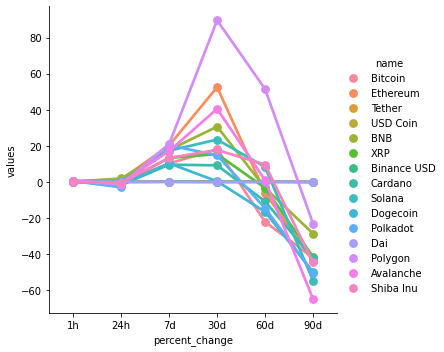

In [60]:
sns.catplot(x='percent_change',y='values',hue='name',data=df6,kind='point')

In [69]:
df7=df[['name','quote.USD.price','timestamp']]
df7=df7.query("name=='Bitcoin'")
df7

,name,quote.USD.price,timestamp
0,Bitcoin,23005.75369,2022-08-02 20:26:56.727597
15,Bitcoin,23005.75369,2022-08-02 20:27:02.190228
30,Bitcoin,23005.75369,2022-08-02 20:27:07.554571
45,Bitcoin,23037.21877,2022-08-02 20:30:05.191516
60,Bitcoin,23037.21877,2022-08-02 20:30:07.592943
75,Bitcoin,23037.21877,2022-08-02 20:30:09.974056
90,Bitcoin,23037.21877,2022-08-02 20:30:12.378998
105,Bitcoin,23037.21877,2022-08-02 20:30:14.751289
120,Bitcoin,23037.21877,2022-08-02 20:30:17.143249
135,Bitcoin,23037.21877,2022-08-02 20:32:22.393249


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

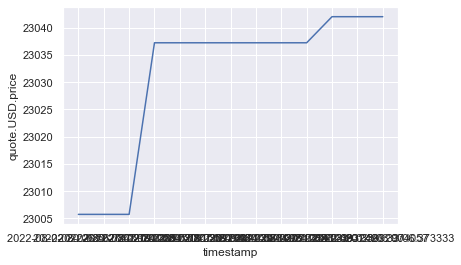

In [73]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp',y='quote.USD.price',data=df7)